# 앞서 구현한 KNN모델의 문제?
- 문제와 답을 알려주고 동일한 문제로 시험을 본다는 것은 무엇을 의미하는가?
- 도미 35마리와 빙어 14마리를 모두 저장해두고 이를 맞추는 것은 당연한 것 아닌가?
- 훈련 데이터가 아닌 데이터로 테스트를 해야 제대로된 정확도라고 볼 수 있음


## 지도 학습과 비지도 학습
### 지도(supervised) 학습
- 훈련 데이터와 정답을 주고 학습을 시키는 것
- 훈련데이터는 입력(Input), 정답 데이터는 타겟(Target). 합쳐서 훈련(train) 데이터
- 일반적으로 7:3, 8:2 등으로 분할함(훈련데이터를 큰 비율로)
- 보통 회귀와 분류에 적용되는 방식

### 비지도(unsupervised) 학습
- 훈련 데이터만 주고 학습을 시키는 것
- 데이터로부터 어떤 특징을 도출하기 위한 목적으로 사용

#### 데이터 준비

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [4]:
# KNN모델 임포트
from sklearn.neighbors import KNeighborsClassifier

# KNN 인스턴스 생성
kn = KNeighborsClassifier()

In [7]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [8]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

#### 왜 정확도가 0인가?

### 샘플링 편향
- 데이터셋에 35개까지 도미데이터이고 그 다음 14개의 데이터가 빙어이다.
- 모델은 도미만으로 학습이 되었고 테스트 데이터는 빙어만 존재함

- 학습 데이터와 테스트 데이터는 도미와 빙어 비율이 비슷해야 한다.
- numpy를 활용하여 이를 해결

In [10]:
# 넘파이 모듈 import하기
import numpy as np
# 생선 데이터로 numpy 배열 생성(input, target)
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# input데이터의 형태 확인
input_arr.shape

(49, 2)

In [11]:
# target데이터의 형태 확인
target_arr.shape

(49,)

In [12]:
# 데이터를 섞기 위해 넘파이의 랜덤기능 활용
index = np.arange(49)
print("1 : ",index)
# 넘파이 배열을 랜덤하게 섞기
np.random.seed(42)
np.random.shuffle(index)
print("2 : ",index)

1 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
2 :  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [21]:
# 넘파이의 배열 인덱싱으로 훈련데이터와 테스트 데이터 나누기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [22]:
# 형태 확인
print('train: ', train_input.shape, train_target.shape)
print('test: ', test_input.shape, test_target.shape)

train:  (35, 2) (35,)
test:  (14, 2) (14,)


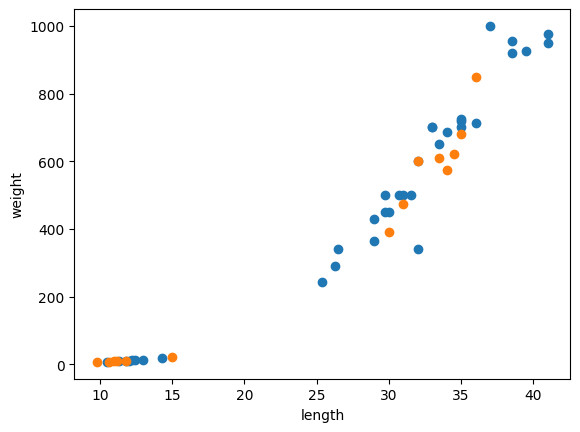

In [23]:
#시각화
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
# KNeighborsClassifier 임포트하기
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 객체 생성
kn = KNeighborsClassifier()

# 학습하기
kn.fit(train_input,train_target)
kn.score(train_input,train_target)

1.0

In [26]:
# 테스트 데이터로 예측해보기
y_hat = kn.predict(test_input)
y_hat

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [27]:
# 테스트 데이터의 정답
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [28]:
# 테스트 데이터의 정답과 비교
kn.score(test_input,test_target)

1.0

## 여기까지 정리 및 이해

그냥 보기좋게 만들어봄..

In [31]:
import pandas as pd

df = pd.DataFrame()
df['fish_length'] = fish_length
df['fish_weight'] = fish_weight
df['도미or빙어'] = fish_target

df

,fish_length,fish_weight,도미or빙어
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1
